In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import SGDClassifier 

In [2]:
train_df = pd.read_csv(r'data\fashion-mnist_train.csv')
test_df = pd.read_csv(r'data\fashion-mnist_test.csv')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_df.shape 

(60000, 785)

In [4]:
train_df = train_df.sample(frac=0.3).reset_index(drop=True)
train_df.shape 

(18000, 785)

In [6]:
Variables = {0: 'T-shirt',
             1: 'Trouser',
             2: 'Pullover',
             3: 'Dress',
             4: 'Coat',
             5: 'Sandal',
             6: 'Shirt',
             7: 'Sneaker',
             8: 'bag',
             9: 'Ankle boot'}

In [7]:
def display_image(features, actual_label ):
    print("Actual label:", Variables[actual_label] )
    
    plt.imshow(features.reshape(28,28))

In [8]:
X = train_df[train_df.columns[1:]]
Y = train_df['label']

In [9]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,1,0,3,1,0,0,...,0,0,0,0,150,147,34,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,110,149,28,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,62,35,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
Y.head()

0    2
1    2
2    7
3    3
4    9
Name: label, dtype: int64

In [11]:
X.loc[5].values[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
Y.loc[5]

5

Actual label: Sandal


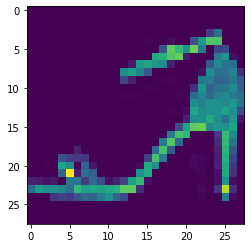

In [13]:
display_image(X.loc[5].values, Y.loc[5])

In [14]:
X = X/25 
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.04,0.0,0.12,0.04,0.0,0.0,...,0.00,0.0,0.0,0.0,6.00,5.88,1.36,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,0.0,4.4,5.96,1.12,0.00,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.04,0.0,0.0,...,2.48,1.4,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [20]:
X_train.shape, X_test.shape

((14400, 784), (3600, 784))

In [21]:
Y_train.shape, Y_test.shape

((14400,), (3600,))

In [24]:
def summarize_classification(Y_test,
                             Y_pred,
                             avg = 'Peso'):
    acc = accurancy_score(Y_test, Y_pred, normalize=True)
    num_acc =accurancy_score(Y_test, Y_pred, normalize=False)
    
    prec = precision_score(Y_test, Y_pred, average='peso')
    recall = recall_score(Y_test, Y_pred, average='peso')
    
    print ("Numero de datos de prueba:",len (Y_test))
    print ("precisión:", num_acc)
    print ("Puntuación de precisión:", acc )
    print ("Puntuación recordada", recall)

In [ ]:
logistic_model = LogisticRegression(solver= 'sag', multi_class='auto', max_iter= 10000,).fit(X_train,Y_train)

In [ ]:
Y_pred = logistic_model.predict(X_test)
Y_pred

In [ ]:
summarize_classification(Y_test, Y_pred)